In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('dataset.csv', index_col=0)

dataset.head()

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882


In [3]:
dataset_prices = dataset
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    dataset_prices['price_'+roi[4:]] = dataset_prices['close']*(dataset_prices[roi]+1)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


In [4]:
dataset_prices["day_sin"] = np.sin(2*np.pi*dataset_prices["day"]/31)
dataset_prices["day_cos"] = np.cos(2*np.pi*dataset_prices["day"]/31)
dataset_prices["month_sin"] = np.sin(2*np.pi*dataset_prices["month"]/12)
dataset_prices["month_cos"] = np.cos(2*np.pi*dataset_prices["month"]/12)
dataset_prices["year_sin"] = np.sin(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["year_cos"] = np.cos(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["sin_log_close"] = np.sin(np.log(dataset_prices["close"]))
dataset_prices["cube_log_score"] = np.square(np.log(dataset_prices["score"]))
dataset_prices["reciprocal_log_close"] = np.reciprocal(np.log(dataset_prices["close"]))
dataset_prices["sin_cos_year"] = np.sin(np.cos(dataset_prices["year"]))
dataset_prices["sin_reciprocal_close"] = np.sin(np.reciprocal(dataset_prices["close"]))
dataset_prices["reciprocal_cube_score"] = np.reciprocal(np.power(dataset_prices["close"], 3))
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,...,month_sin,month_cos,year_sin,year_cos,sin_log_close,cube_log_score,reciprocal_log_close,sin_cos_year,sin_reciprocal_close,reciprocal_cube_score
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,...,0.866025,0.5,0.003107,0.999995,0.526907,0.002245,0.386603,0.809936,0.075202,4.264964e-04
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,...,0.866025,0.5,0.003107,0.999995,0.784609,0.002343,0.446523,0.809936,0.106308,1.208251e-03
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,...,0.866025,0.5,0.003107,0.999995,0.437112,0.004636,0.371857,0.809936,0.067883,3.135282e-04
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,...,0.866025,0.5,0.003107,0.999995,0.867595,0.006444,0.478184,0.809936,0.123219,1.885165e-03
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,...,0.866025,0.5,0.003107,0.999995,-0.516731,0.008462,0.271398,0.809936,0.025104,1.582592e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,...,0.866025,-0.5,0.055904,0.998436,-0.977979,0.175446,0.222117,-0.545390,0.011085,1.362185e-06
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,...,0.866025,-0.5,0.055904,0.998436,0.829117,0.182939,0.137728,-0.545390,0.000703,3.468471e-10
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,...,0.866025,-0.5,0.055904,0.998436,-0.850495,0.184274,0.189888,-0.545390,0.005163,1.376190e-07
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,...,0.866025,-0.5,0.055904,0.998436,-0.743741,0.190129,0.251241,-0.545390,0.018680,6.519410e-06


In [5]:
X = dataset_prices[['score', 'symbol', 'close', 'year', 'month', 'day', 'econ_branch',
 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos',
  'sin_log_close', 'cube_log_score', 'reciprocal_log_close', 'sin_cos_year', 'sin_reciprocal_close', 'reciprocal_cube_score']]
y = dataset_prices[['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year']]

In [6]:
X.columns, y.columns, X.shape, y.shape

(Index(['score', 'symbol', 'close', 'year', 'month', 'day', 'econ_branch',
        'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos',
        'sin_log_close', 'cube_log_score', 'reciprocal_log_close',
        'sin_cos_year', 'sin_reciprocal_close', 'reciprocal_cube_score'],
       dtype='object'),
 Index(['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year'],
       dtype='object'),
 (10410, 19),
 (10410, 8))

In [7]:
dummies1 = pd.get_dummies(X[['econ_branch']], drop_first=True)
dummies2 = pd.get_dummies(X[['symbol']], drop_first=True)
X = pd.concat([X.drop(['econ_branch'],axis=1), dummies1],axis=1)
X = pd.concat([X.drop(['symbol'],axis=1), dummies2],axis=1)
X.shape

(10410, 1161)

In [8]:
y

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...
10405,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


We split the data into train and test with proportions 0.67 - 0.33

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

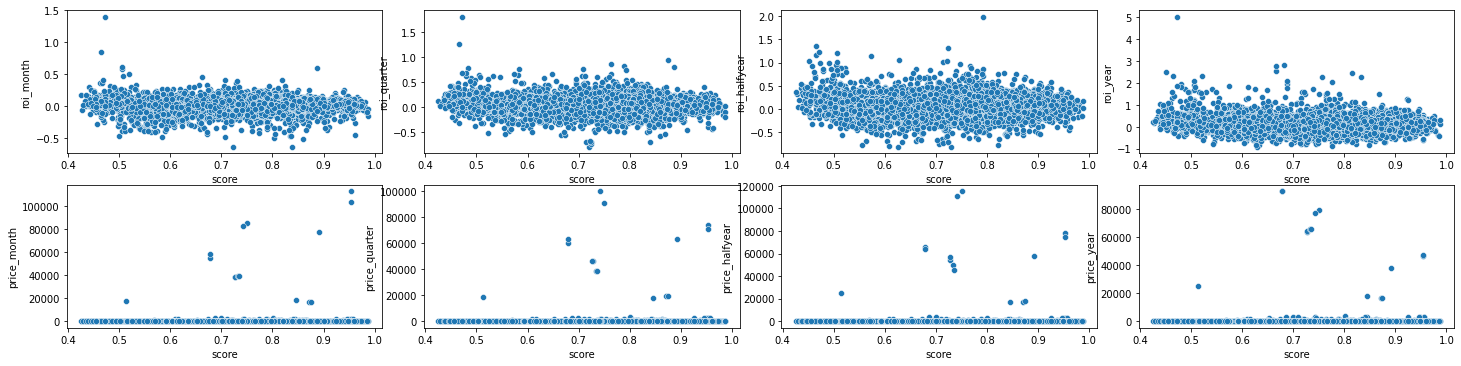

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(20, 5))
fig.tight_layout()
for col_id, roi in enumerate(y.columns):
    sn.scatterplot(ax=axs[col_id//4, col_id%4], x=X_train.score, y=y_train[roi])

In [11]:
X["const"] = 1.0
X

,score,close,year,month,day,day_sin,day_cos,month_sin,month_cos,year_sin,...,symbol_XEL,symbol_XLNX,symbol_XOM,symbol_XRAY,symbol_XRX,symbol_XYL,symbol_YUM,symbol_ZD,symbol_ZTS,const
0,0.953727,13.285000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
1,0.952753,9.388889,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
2,0.934181,14.720000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
3,0.922862,8.095000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
4,0.912117,39.830002,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,0.657795,90.209999,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10406,0.651998,1423.270020,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10407,0.650983,193.690002,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10408,0.646593,53.529999,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0


In [12]:
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf

# for roi in y.columns:
#     ols_data = X
#     ols_data["roi"] = y[roi]
#     model = smf.ols('roi ~ score + close + year', data=ols_data).fit()
#     names = ['Lagrange multiplier statistic', 'p-value',
#         'f-value', 'f p-value']
#     test = sms.het_breuschpagan(model.resid, model.model.exog)

#     print(test)
# print(names)

All p-values are well below 0.05, data isn't homoscedastic for any investment horizon

In [13]:
y_train

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
3033,0.008192,-0.015862,0.079310,0.221022,57.840000,56.459999,61.919998,70.050003
8734,-0.044041,0.126943,0.093523,0.273057,36.900002,43.500000,42.209999,49.139999
4049,0.007254,0.077720,0.104663,0.006477,38.880001,41.599998,42.639999,38.849998
7283,0.004914,-0.008980,-0.027279,-0.225178,59.310001,58.490002,57.410000,45.730000
5265,-0.037806,-0.105114,-0.107080,-0.090253,44.029999,40.950001,40.860001,41.630001
...,...,...,...,...,...,...,...,...
5734,0.039870,0.094914,-0.023964,0.210339,99.370003,104.629997,93.269997,115.660004
5191,0.043577,0.055833,-0.064458,-0.137994,45.980000,46.520000,41.220001,37.980000
5390,0.085159,0.169285,0.255064,0.247830,52.500000,56.570000,60.720001,60.369999
860,-0.039411,-0.042682,-0.031889,-0.102208,14.685000,14.635000,14.800000,13.725000


In [14]:
X_train.shape, y_train.shape

((6974, 1161), (6974, 8))

In [16]:
#https://towardsdatascience.com/how-to-convert-pandas-dataframe-to-keras-rnn-and-back-to-pandas-for-multivariate-regression-dcc34c991df9

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
y_cols = ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year',
          'price_month', 'price_quarter', 'price_halfyear', 'price_year'
        ]
y_chosen = 'roi_month'
y_train_data = y_train[[y_chosen]]
y_test_data = y_test[[y_chosen]]

y_train_data.shape, y_test_data.shape

((6974, 1), (3436, 1))

In [18]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
scaled_X_test = Xscaler.transform(X_test)

Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Yscaler.fit(y_train_data)
scaled_y_train = Yscaler.transform(y_train_data)

In [19]:
input_size = 50
batch_size = 32

generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=input_size, batch_size=batch_size)

generator[0][0].shape

(32, 50, 1161)

In [20]:
n_features= X_train.shape[1]

model = keras.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
model.add(layers.LSTM(16, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
model.add(layers.LSTM(8, activation='relu', input_shape=(input_size, n_features)))
model.add(layers.Dense(64))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

2022-06-07 01:08:54.311123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-07 01:08:54.311384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 01:08:54.311480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-07 01:08:54.311580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-07 01:08:54.311651: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            313856    
                                                                 
 lstm_1 (LSTM)               (None, 50, 16)            5184      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 320,481
Trainable params: 320,481
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(generator,epochs=5)

Epoch 1/5
217/217 [==============================] - 17s 68ms/step - loss: 0.0051
Epoch 2/5
217/217 [==============================] - 16s 72ms/step - loss: 0.0021
Epoch 3/5
217/217 [==============================] - 15s 70ms/step - loss: 0.0020
Epoch 4/5
217/217 [==============================] - 15s 70ms/step - loss: 0.0020
Epoch 5/5
217/217 [==============================] - 17s 80ms/step - loss: 0.0019


In [22]:
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=batch_size)
y_pred_scaled = model.predict(test_generator)

106/106 [==============================] - 2s 20ms/step


In [23]:
print(y_test_data.shape, y_pred_scaled.shape, len(test_generator))
print(f"{len(test_generator)}*{batch_size} = "+str(len(test_generator)*batch_size))
f"{y_pred_scaled.shape[0]} < {len(test_generator)*batch_size} < {y_test_data.shape[0]}"

(3436, 1) (3386, 1) 106
106*32 = 3392


'3386 < 3392 < 3436'

Remove last 50 observations from scaled_X_test

In [24]:
y_test_data_concat = y_test_data[:-input_size]
y_test_data_concat.shape, y_pred_scaled.shape

((3386, 1), (3386, 1))

In [25]:
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [26]:
y_train_pred_scaled = model.predict(generator)

217/217 [==============================] - 4s 19ms/step


In [27]:
print(y_train_data.shape, y_train_pred_scaled.shape, len(generator))
print(f"{len(generator)}*{batch_size} = "+str(len(generator)*batch_size))
f"{y_train_pred_scaled.shape[0]} < {len(generator)*batch_size} < {y_train_data.shape[0]}"

(6974, 1) (6924, 1) 217
217*32 = 6944


'6924 < 6944 < 6974'

In [28]:
y_train_data_concat = y_train_data[:-input_size]
y_train_data_concat.shape, y_train_pred_scaled.shape

((6924, 1), (6924, 1))

In [29]:
y_train_pred = Yscaler.inverse_transform(y_train_pred_scaled)

In [30]:
results_test = pd.DataFrame({'y_true':y_test_data_concat[y_chosen], 'y_hat':y_pred.ravel()})
results_train = pd.DataFrame({'y_true':y_train_data_concat[y_chosen], 'y_train_hat':y_train_pred.ravel()})

In [31]:
results_test

,y_true,y_hat
3952,0.037272,-0.012818
4597,-0.009576,-0.011240
9624,-0.108696,-0.011265
6871,-0.047912,-0.008620
4294,0.052019,-0.007261
...,...,...
9290,0.086143,0.000775
5205,0.019327,0.003931
4419,0.026473,0.009355
188,0.050492,0.015535


In [32]:
print("TEST RESULTS:")
print("1. Root mean squared error: %.2f" % mean_squared_error(results_test["y_true"], results_test["y_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_test["y_true"], results_test["y_hat"]))
print("3. R^2: %.2f" % r2_score(results_test["y_true"], results_test["y_hat"]))

TEST RESULTS:
1. Root mean squared error: 0.09
2. Mean absolute percentage error: 288281094618.80
3. R^2: -0.02


In [33]:
print("TRAIN RESULTS:")
print("1. Root mean squared error: %.2f" % mean_squared_error(results_train["y_true"], results_train["y_train_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_train["y_true"], results_train["y_train_hat"]))
print("3. R^2: %.2f" % r2_score(results_train["y_true"], results_train["y_train_hat"]))

TRAIN RESULTS:
1. Root mean squared error: 0.09
2. Mean absolute percentage error: 392676473064.80
3. R^2: -0.05


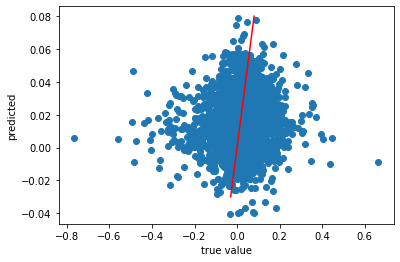

In [34]:
plt.scatter(results_test["y_true"], results_test["y_hat"])
# plt.xlim(-0.8, 0.7)
# plt.ylim(-0.8, 0.7)
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-0.03, 0.08], [-0.03, 0.08], color='red')
# plt.plot([-0.7, 0.6], [-0.7, 0.6], color='red')
plt.show()

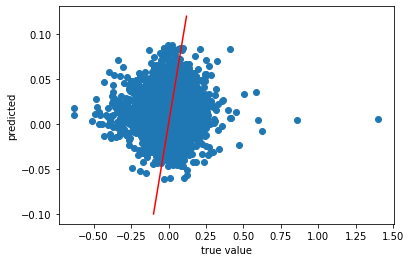

In [35]:
plt.scatter(results_train["y_true"], results_train["y_train_hat"])
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-0.1, .12], [-0.1, .12], color='red')
# plt.plot([-0.7, 0.6], [-0.7, 0.6], color='red')
plt.show()

Ideally all of the points should be on the red line (slope = 1)

In [42]:
def calculate_errors_for_train_test_split(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, epochs=5, input_size=50, batch_size=32):
    Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
    Xscaler.fit(X_train)
    scaled_X_train = Xscaler.transform(X_train)
    scaled_X_test = Xscaler.transform(X_test)

    Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that y data is also in 0, 1 range
    Yscaler.fit(y_train)
    scaled_y_train = Yscaler.transform(y_train)

    generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=input_size, batch_size=batch_size)

    n_features= X_train.shape[1]

    model = keras.Sequential()
    model.add(layers.LSTM(64, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
    model.add(layers.LSTM(16, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
    model.add(layers.LSTM(8, activation='relu', input_shape=(input_size, n_features)))
    model.add(layers.Dense(64))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(generator,epochs=epochs)
    test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=32)
    y_pred_scaled = model.predict(test_generator)
    y_pred = Yscaler.inverse_transform(y_pred_scaled)

    y_test = y_test[:-50]

    errors_report = ["1. Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)]
    errors_report.append("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
    errors_report.append("3. R^2: %.2f" % r2_score(y_test, y_pred))

    return errors_report

In [43]:
def calculate_errors_for_cross_validation(X, y, epochs=5, input_size=50, batch_size=32):
    kfold = KFold(n_splits=5, shuffle=True)
    scores = {}
    scores['test_neg_mean_absolute_error'] = []
    scores['test_neg_mean_absolute_percentage_error'] = []
    scores['test_r2'] = []

    for train, test in kfold.split(X, y):
        X_train = X.iloc[train, :]
        X_test = X.iloc[test, :]
        y_train = y.iloc[train, :]
        y_test = y.iloc[test, :]

        Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
        Xscaler.fit(X_train)
        scaled_X_train = Xscaler.transform(X_train)
        scaled_X_test = Xscaler.transform(X_test)

        Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that y data is also in 0, 1 range
        Yscaler.fit(y_train)
        scaled_y_train = Yscaler.transform(y_train)

        generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=input_size, batch_size=batch_size)

        n_features= X_train.shape[1]

        model = keras.Sequential()
        model.add(layers.LSTM(64, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
        model.add(layers.LSTM(16, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
        model.add(layers.LSTM(8, activation='relu', input_shape=(input_size, n_features)))
        model.add(layers.Dense(64))
        model.add(layers.Dense(1))
        model.compile(optimizer='adam', loss='mse')

        model.fit(generator,epochs=epochs)
        test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=32)
        y_pred_scaled = model.predict(test_generator)
        y_pred = Yscaler.inverse_transform(y_pred_scaled)

        y_test = y_test[:-50]

        scores['test_neg_mean_absolute_error'].append(mean_squared_error(y_test, y_pred))
        scores['test_neg_mean_absolute_percentage_error'].append(mean_absolute_percentage_error(y_test, y_pred))
        scores['test_r2'].append(r2_score(y_test, y_pred))

    mae = np.abs(scores['test_neg_mean_absolute_error']).mean()
    mape = np.abs(scores['test_neg_mean_absolute_percentage_error']).mean()
    r2 = np.abs(scores['test_r2']).mean()
    errors_report = ["1. Mean squared error: %.2f" % mae]
    errors_report.append("2. Mean absolute percentage error: %.2f" % mape)
    errors_report.append("3. R^2: %.2f" % r2)
    print(errors_report)
    return errors_report

In [44]:
pdf_reports = dict()
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    pdf_reports[roi] = {}

    pdf_reports[roi]['lstm_train_test'] = calculate_errors_for_train_test_split(X_train, X_test, y_train[[roi]], y_test[[roi]])

    pdf_reports[roi]['lstm_cross_validate'] = calculate_errors_for_cross_validation(X, y[[roi]])

Epoch 1/5
217/217 [==============================] - 18s 71ms/step - loss: 0.0038
Epoch 2/5
217/217 [==============================] - 15s 70ms/step - loss: 0.0021
Epoch 3/5
217/217 [==============================] - 16s 73ms/step - loss: 0.0020
Epoch 4/5
217/217 [==============================] - 17s 77ms/step - loss: 0.0020
Epoch 5/5
106/106 [==============================] - 3s 21ms/step
Epoch 1/5
259/259 [==============================] - 22s 75ms/step - loss: 0.0093
Epoch 2/5
259/259 [==============================] - 19s 75ms/step - loss: 0.0036
Epoch 3/5
259/259 [==============================] - 19s 73ms/step - loss: 0.0032
Epoch 4/5
259/259 [==============================] - 18s 71ms/step - loss: 0.0030
Epoch 5/5
64/64 [==============================] - 2s 21ms/step
Epoch 1/5
259/259 [==============================] - 21s 72ms/step - loss: 0.0052
Epoch 2/5
259/259 [==============================] - 19s 72ms/step - loss: 0.0018
Epoch 3/5
259/259 [==============================]

In [46]:
with open('pickled_results/lstm_scores.pickle', 'wb') as f:
    pickle.dump(pdf_reports, f)